# 필요 Library 설치

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
import umap.umap_ as umap

# 데이터 Description

- 'generated_imputed.csv` : 생성된 자료 중 일부 결측값을 해당 컬럼의 평균값으로 대치하여 만든 데이터

In [2]:
generated_imputed = pd.read_csv("generated_imputed.csv", engine="python")

In [3]:
# 데이터 확인
generated_imputed.head()

,WBC,fschizoyn,Weight,fbipolyn,dep,flipyn,FBS,asth2,FEF25_75__exp,htn,...,Calcium,PEF__exp,DBP,FVC__exp,jb_irelay,ces_dep,sex,PEF,alch,AST
0,6.6,1.0,64.4,1.0,1.0,1.0,86.0,1.0,132.000000,2.0,...,10.8,80.000000,65.0,90.000000,1.0,25.0,2.0,6.200000,1.0,10.0
1,4.2,1.0,69.6,1.0,1.0,1.0,110.0,1.0,66.000000,1.0,...,8.8,120.000000,82.0,100.000000,1.0,9.0,2.0,6.200000,1.0,12.0
2,9.6,1.0,43.8,1.0,1.0,1.0,123.0,1.0,35.000000,1.0,...,10.3,55.000000,82.0,119.000000,1.0,19.0,2.0,8.400000,1.0,22.0
3,8.2,1.0,66.3,1.0,1.0,1.0,120.0,1.0,93.520318,1.0,...,10.0,105.912085,79.0,98.557767,1.0,11.0,1.0,7.310154,1.0,25.0
4,5.4,1.0,77.7,1.0,1.0,1.0,105.0,2.0,93.520318,1.0,...,9.2,105.912085,76.0,98.557767,1.0,20.0,1.0,7.310154,1.0,47.0


# Visualization

## 1) Sex 변수를 기준으로 dimension reduction

In [15]:
features_sex = generated_imputed.drop("sex", axis=1) # independent variable 
features_sex.head()

,WBC,fschizoyn,Weight,fbipolyn,dep,flipyn,FBS,asth2,FEF25_75__exp,htn,...,lip,Calcium,PEF__exp,DBP,FVC__exp,jb_irelay,ces_dep,PEF,alch,AST
0,6.6,1.0,64.4,1.0,1.0,1.0,86.0,1.0,132.000000,2.0,...,1.0,10.8,80.000000,65.0,90.000000,1.0,25.0,6.200000,1.0,10.0
1,4.2,1.0,69.6,1.0,1.0,1.0,110.0,1.0,66.000000,1.0,...,1.0,8.8,120.000000,82.0,100.000000,1.0,9.0,6.200000,1.0,12.0
2,9.6,1.0,43.8,1.0,1.0,1.0,123.0,1.0,35.000000,1.0,...,1.0,10.3,55.000000,82.0,119.000000,1.0,19.0,8.400000,1.0,22.0
3,8.2,1.0,66.3,1.0,1.0,1.0,120.0,1.0,93.520318,1.0,...,1.0,10.0,105.912085,79.0,98.557767,1.0,11.0,7.310154,1.0,25.0
4,5.4,1.0,77.7,1.0,1.0,1.0,105.0,2.0,93.520318,1.0,...,1.0,9.2,105.912085,76.0,98.557767,1.0,20.0,7.310154,1.0,47.0


In [20]:
target_sex = generated_imputed["sex"].values # target variable
print(target_sex)

[2. 2. 2. ... 2. 2. 1.]


In [8]:
# t-SNE와 UMAP 알고리즘을 사용하여 2차원으로 차원 축소 
tsne_sex = TSNE(n_components=2).fit_transform(features_sex.values)

In [9]:
tsne_sex.shape

(101500, 2)

In [10]:
umap_sex = umap.UMAP().fit_transform(features_sex.values)

/Users/iskim/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [11]:
umap_sex.shape

(101500, 2)

In [12]:
sex_reduced = pd.DataFrame({"tsne_1" : tsne_sex[:, 0], "tsne_2" : tsne_sex[:, 1],
                            "umap_1" : umap_sex[:, 0], "umap_2" : umap_sex[:, 1],
                            "sex" : target_sex})

In [13]:
sex_reduced.head()

,tsne_1,tsne_2,umap_1,umap_2,sex
0,17.724035,2.489490,0.111552,3.086156,2.0
1,-39.184128,-6.138649,10.352745,6.384474,2.0
2,9.552232,-10.208425,-0.181740,5.035506,2.0
3,-18.876854,28.198839,14.597417,8.114429,1.0
4,-5.821379,-9.578472,-2.077428,5.954737,1.0


In [14]:
sex_reduced.to_csv("sex_reduced.csv")

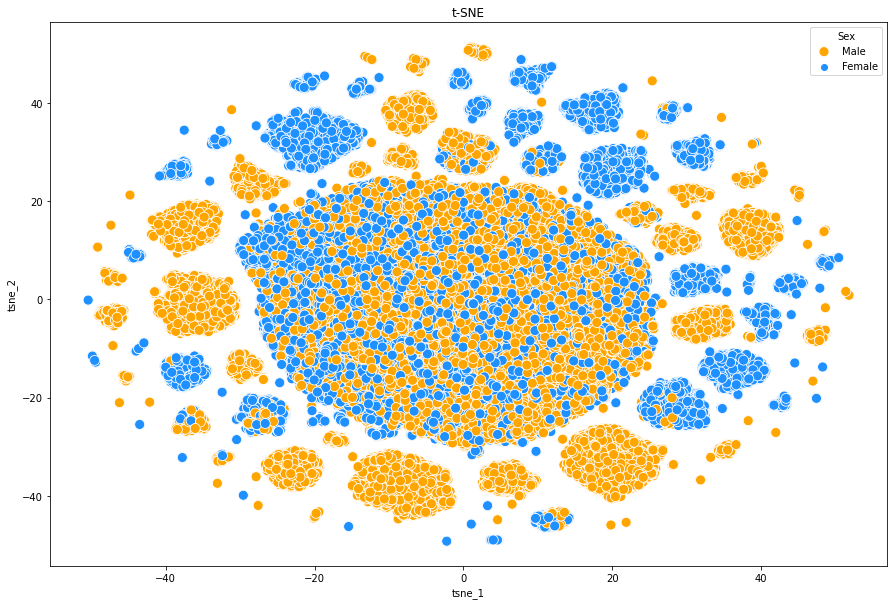

In [18]:
plt.figure(figsize=(15,10))
color_dict = dict({1 : "dodgerblue", 2 : "orange"})
g = sns.scatterplot(x="tsne_1", y="tsne_2", hue="sex", palette=color_dict, s=100, data=sex_reduced, legend=True)
plt.title("t-SNE")
plt.legend(title="Sex", labels=["Male", "Female"])
plt.show(g)

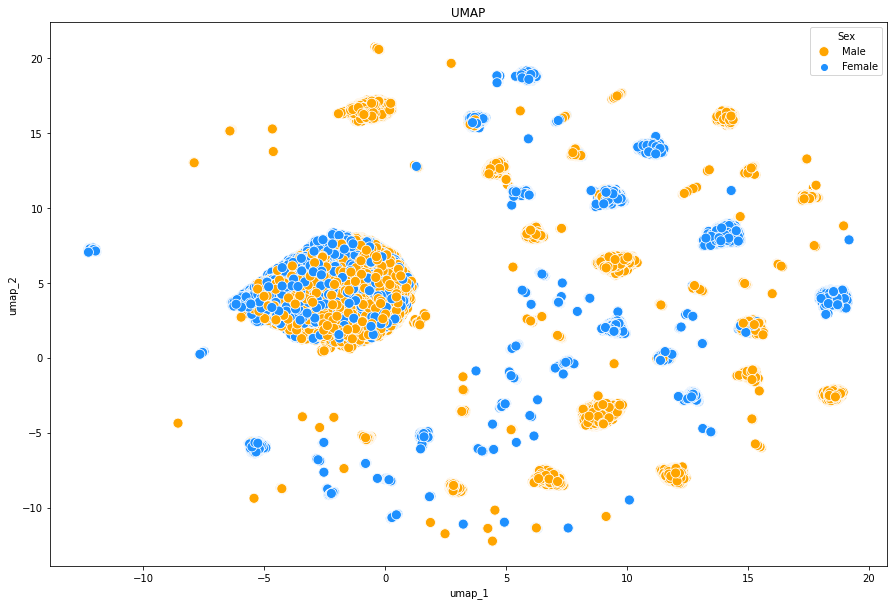

In [19]:
plt.figure(figsize=(15,10))
color_dict = dict({1 : "dodgerblue", 2 : "orange"})
g = sns.scatterplot(x="umap_1", y="umap_2", hue="sex", palette=color_dict, s=100, data=sex_reduced, legend=True)
plt.title("UMAP")
plt.legend(title="Sex", labels=["Male", "Female"])
plt.show(g)

## 2) DM (당뇨병 진단 여부) 변수를 기준으로 dimension reduction

In [ ]:
features_dm = generated_imputed.drop("dm", axis=1) # independent variable 
target_dm = generated_imputed["dm"].values # target variable

In [ ]:
# t-SNE와 UMAP 알고리즘을 사용하여 2차원으로 차원 축소 
tsne_dm = TSNE(n_components=2).fit_transform(features_dm.values)
umap_dm = umap.UMAP().fit_transform(features_dm.values)

/home/yjjeong/anaconda3/envs/yj_ds_py38/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [ ]:
dm_reduced = pd.DataFrame({"tsne_1" : tsne_dm[:, 0], "tsne_2" : tsne_dm[:, 1],
                            "umap_1" : umap_dm[:, 0], "umap_2" : umap_dm[:, 1],
                            "dm" : target_dm})

In [ ]:
dm_reduced.to_csv("dm_reduced.csv")

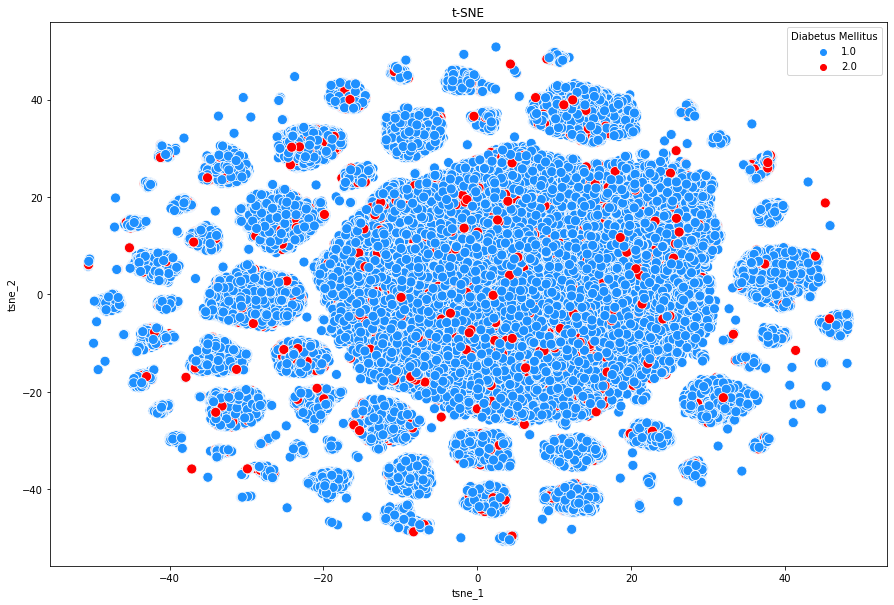

In [ ]:
plt.figure(figsize=(15,10))
color_dict = dict({1 : "dodgerblue", 2 : "red"})
g = sns.scatterplot(x="tsne_1", y="tsne_2", hue="dm", palette=color_dict, s=100, data=dm_reduced, legend=True)
plt.title("t-SNE")
plt.legend(title="Diabetus Mellitus") # labels=["Negative", "Positive"]
plt.show(g)

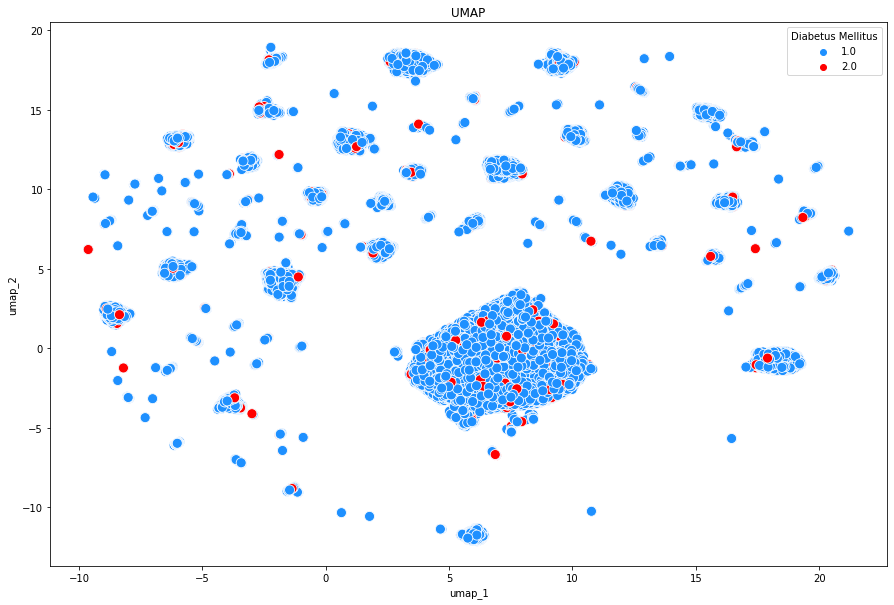

In [ ]:
plt.figure(figsize=(15,10))
color_dict = dict({1 : "dodgerblue", 2 : "red"})
g = sns.scatterplot(x="umap_1", y="umap_2", hue="dm", palette=color_dict, s=100, data=dm_reduced, legend=True)
plt.title("UMAP")
plt.legend(title="Diabetus Mellitus") # labels=["Negative", "Positive"]
plt.show(g)

# Single Cluster Analysis 

- UMAP 결과에서 단독으로 큰 하나의 클러스터가 생성되어있어, 해당 클러스터를 자세히 보기 위함

## 1) Sex 기준

- 위의 UMAP 결과에서 Main cluster 만 따로 확인해보기 위해 DBSCAN 클러스터링 알고리즘 사용

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
sex_reduced.head()

,tsne_1,tsne_2,umap_1,umap_2,sex,DBSCAN_cluster
0,-1.770459,25.242903,5.990578,-1.784790,2.0,0
1,-16.670755,-30.625494,-7.600947,5.892385,2.0,1
2,11.074271,16.115391,8.137117,-1.652534,2.0,0
3,-21.680458,-26.507126,12.680542,14.448494,1.0,2
4,6.587345,0.393816,9.406620,-3.438395,1.0,0


In [ ]:
cluster = DBSCAN(n_jobs = -1)

In [ ]:
model_sex = cluster.fit(sex_reduced[["umap_1", "umap_2"]].values)
sex_reduced["DBSCAN_cluster"] = model_sex.labels_

In [ ]:
# index of cluster with maximum points (main cluster)
sex_umap_main_cluster_idx = np.argmax(np.unique(model_sex.labels_, return_counts = True)[1])

In [ ]:
sex_umap_main_cluster = sex_reduced.loc[sex_reduced["DBSCAN_cluster"] == sex_umap_main_cluster_idx]

In [ ]:
sex_umap_main_cluster.head()

,tsne_1,tsne_2,umap_1,umap_2,sex,DBSCAN_cluster
0,-1.770459,25.242903,5.990578,-1.784790,2.0,0
2,11.074271,16.115391,8.137117,-1.652534,2.0,0
4,6.587345,0.393816,9.406620,-3.438395,1.0,0
6,0.062306,9.490357,7.093967,-2.408070,1.0,0
7,1.586003,1.865415,7.796623,-3.777759,1.0,0


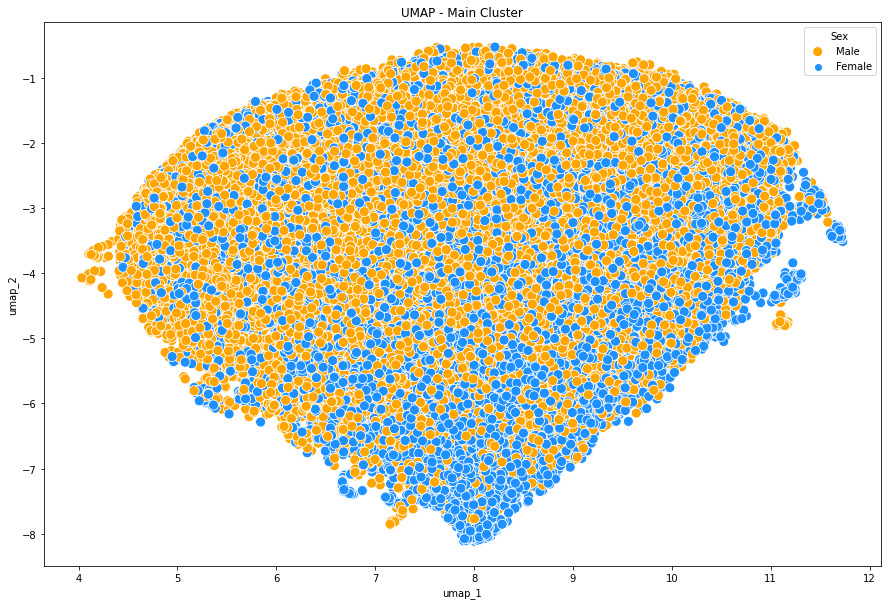

In [ ]:
plt.figure(figsize=(15,10))
color_dict = dict({1 : "dodgerblue", 2 : "orange"})
g = sns.scatterplot(x="umap_1", y="umap_2", hue="sex", palette=color_dict, s=100, data=sex_umap_main_cluster, legend=True)
plt.title("UMAP - Main Cluster")
plt.legend(title="Sex", labels=["Male", "Female"])
plt.show(g)

## 2) DM 기준

In [ ]:
model_dm = cluster.fit(dm_reduced[["umap_1", "umap_2"]].values)
dm_reduced["DBSCAN_cluster"] = model_dm.labels_

In [ ]:
dm_reduced.head()

,tsne_1,tsne_2,umap_1,umap_2,dm,DBSCAN_cluster
0,-13.530903,0.056827,8.340916,-2.904307,1.0,0
1,44.294979,7.263562,7.909745,10.889163,1.0,1
2,-1.293858,-9.506601,6.167190,-2.691517,1.0,0
3,-21.264439,14.324333,-1.425374,4.674622,1.0,2
4,15.762550,-5.069273,5.491469,-0.726152,1.0,0


In [ ]:
# index of cluster with maximum points (main cluster)
dm_umap_main_cluster_idx = np.argmax(np.unique(model_dm.labels_, return_counts = True)[1])

In [ ]:
dm_umap_main_cluster = dm_reduced.loc[sex_reduced["DBSCAN_cluster"] == dm_umap_main_cluster_idx]

In [ ]:
dm_umap_main_cluster.head()

,tsne_1,tsne_2,umap_1,umap_2,dm,DBSCAN_cluster
0,-13.530903,0.056827,8.340916,-2.904307,1.0,0
2,-1.293858,-9.506601,6.167190,-2.691517,1.0,0
4,15.762550,-5.069273,5.491469,-0.726152,1.0,0
6,2.787801,3.180573,7.632316,-2.097170,1.0,0
7,9.296308,3.778683,7.019457,-0.669539,1.0,0


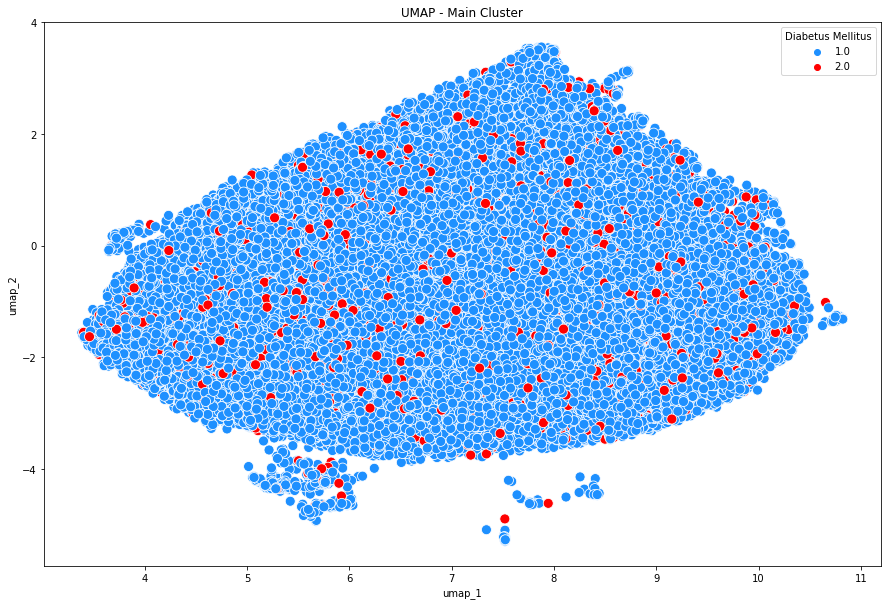

In [ ]:
plt.figure(figsize=(15,10))
color_dict = dict({1 : "dodgerblue", 2 : "red"})
g = sns.scatterplot(x="umap_1", y="umap_2", hue="dm", palette=color_dict, s=100, data=dm_umap_main_cluster, legend=True)
plt.title("UMAP - Main Cluster")
plt.legend(title="Diabetus Mellitus") # labels=["Negative", "Positive"]
plt.show(g)